In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import math

In [2]:
imagesize=256
batchsize=32
channels=3
epochs=75

In [3]:
data=tf.keras.preprocessing.image_dataset_from_directory(
    'PlantVillage', shuffle=True, image_size = (imagesize,imagesize), batch_size=batchsize
)

Found 16011 files belonging to 10 classes.


In [4]:
class_names=data.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

train/val/test split
training 80%
validation 10%
test 10%

In [5]:
len(data)

501

In [6]:
train_size=.8
val_size=.1
test_size=.1

In [7]:
train=round(len(data)*train_size)
train

401

In [8]:
train_data= data.take(train)
len(train_data)

401

In [9]:
test_val_data = data.skip(train)
len(test_val_data)

100

In [10]:
val_data=test_val_data.take(math.floor(len(data)*val_size))

In [11]:
test_data=test_val_data.skip(len(val_data))

In [12]:
# def get_train_val_test_partitions(data,train_size=.8, val_size=.1, test_size=.1, shuffle=True, shuffle_size=10000):
#     data_size=len(data)
    
#     trainS=int(train_size*data_size)
#     valS=int(val_size*data_size)
    
#     train_data=data.take(trainS)

#     val_data=data.skip(trainS).take(valS)
#     test_data=data.skip(trainS).skip(valS)
    
#     return train_data, val_data, test_data

In [13]:
train_data=train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_data=val_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_data=test_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [14]:
resize_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(imagesize,imagesize),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [15]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [16]:
n_classes=10
inputshape=(batchsize,imagesize,imagesize,channels)
#use softmax to normalize probability of classes

model <br>
Model 1: 34 epochs, batch normalization <br>
Model 2: 50 epochs, added dropout .2 <br>
Model 3: 50 epochs, changed dropout to .5 <br>
Model 3: 75 epochs, changed dropout to .05, removed from second layer <br>

In [17]:
m2 = models.Sequential([
    resize_rescale,
    data_augmentation,
    layers.Conv2D(64, (3,3),activation='relu',input_shape=inputshape),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3),activation='relu',input_shape=inputshape),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3),activation='relu',input_shape=inputshape),
    layers.Dropout(0.05),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3),activation='relu',input_shape=inputshape),
    layers.Dropout(0.05),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3),activation='relu',input_shape=inputshape),
    layers.Dropout(0.05),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3),activation='relu',input_shape=inputshape),
    layers.Dropout(0.05),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')
])
m2.build(input_shape=inputshape)

In [18]:
m2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)     

In [19]:
m2.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [20]:
history=m2.fit(
    train_data,
    epochs=epochs,
    batch_size=batchsize,
    verbose=1,
    validation_data=val_data
)

Epoch 1/75
401/401 [==============================] - 207s 476ms/step - loss: 0.8179 - accuracy: 0.7166 - val_loss: 5.0050 - val_accuracy: 0.2125
Epoch 2/75
401/401 [==============================] - 185s 462ms/step - loss: 0.4373 - accuracy: 0.8459 - val_loss: 0.7851 - val_accuracy: 0.7431
Epoch 3/75
401/401 [==============================] - 185s 462ms/step - loss: 0.3272 - accuracy: 0.8822 - val_loss: 1.7336 - val_accuracy: 0.5119
Epoch 4/75
401/401 [==============================] - 184s 459ms/step - loss: 0.2648 - accuracy: 0.9114 - val_loss: 0.5911 - val_accuracy: 0.7931
Epoch 5/75
401/401 [==============================] - 185s 460ms/step - loss: 0.2174 - accuracy: 0.9218 - val_loss: 0.8040 - val_accuracy: 0.7437
Epoch 6/75
401/401 [==============================] - 185s 461ms/step - loss: 0.1834 - accuracy: 0.9355 - val_loss: 0.7878 - val_accuracy: 0.7581
Epoch 7/75
401/401 [==============================] - 185s 460ms/step - loss: 0.1756 - accuracy: 0.9388 - val_loss: 0.7116 -

34 epochs

In [21]:
scores2 = m2.evaluate(test_data)

50/50 [==============================] - 10s 59ms/step - loss: 0.1610 - accuracy: 0.9588


In [22]:
scores2

[0.16104069352149963, 0.958834707736969]

In [23]:
history

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [25]:
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

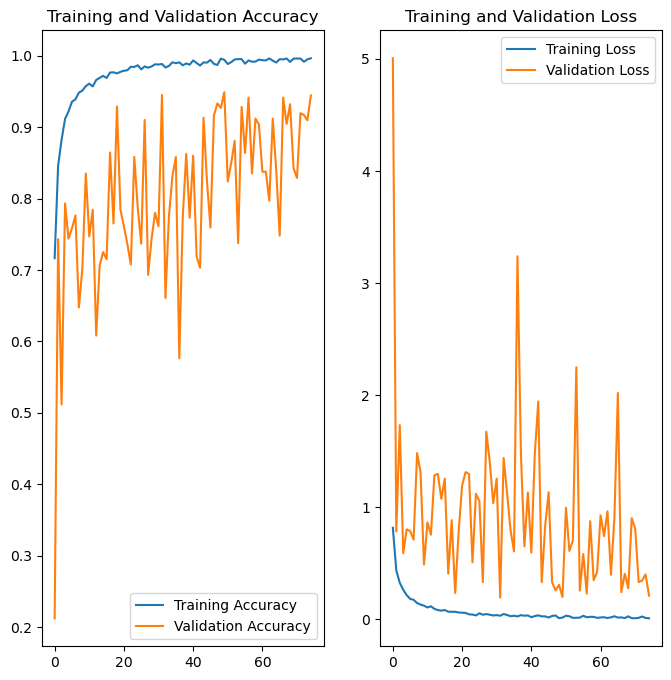

In [26]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), accuracy, label='Training Accuracy')
plt.plot(range(epochs), val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
first image's actual label: Tomato__Tomato_mosaic_virus
1/1 [==============================] - 0s 315ms/step
Predicted label: Tomato__Tomato_mosaic_virus


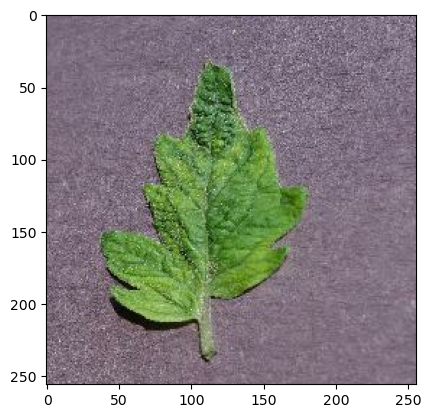

In [27]:
for images_batch, labels_batch in test_data.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0]
    print('first image to predict')
    plt.imshow(first_image)
    print("first image's actual label:",class_names[first_label])
    
    batch_prediction = m2.predict(images_batch)
    print("Predicted label:",class_names[np.argmax(batch_prediction[0])])

In [28]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 [==============================] - 0s 20ms/step


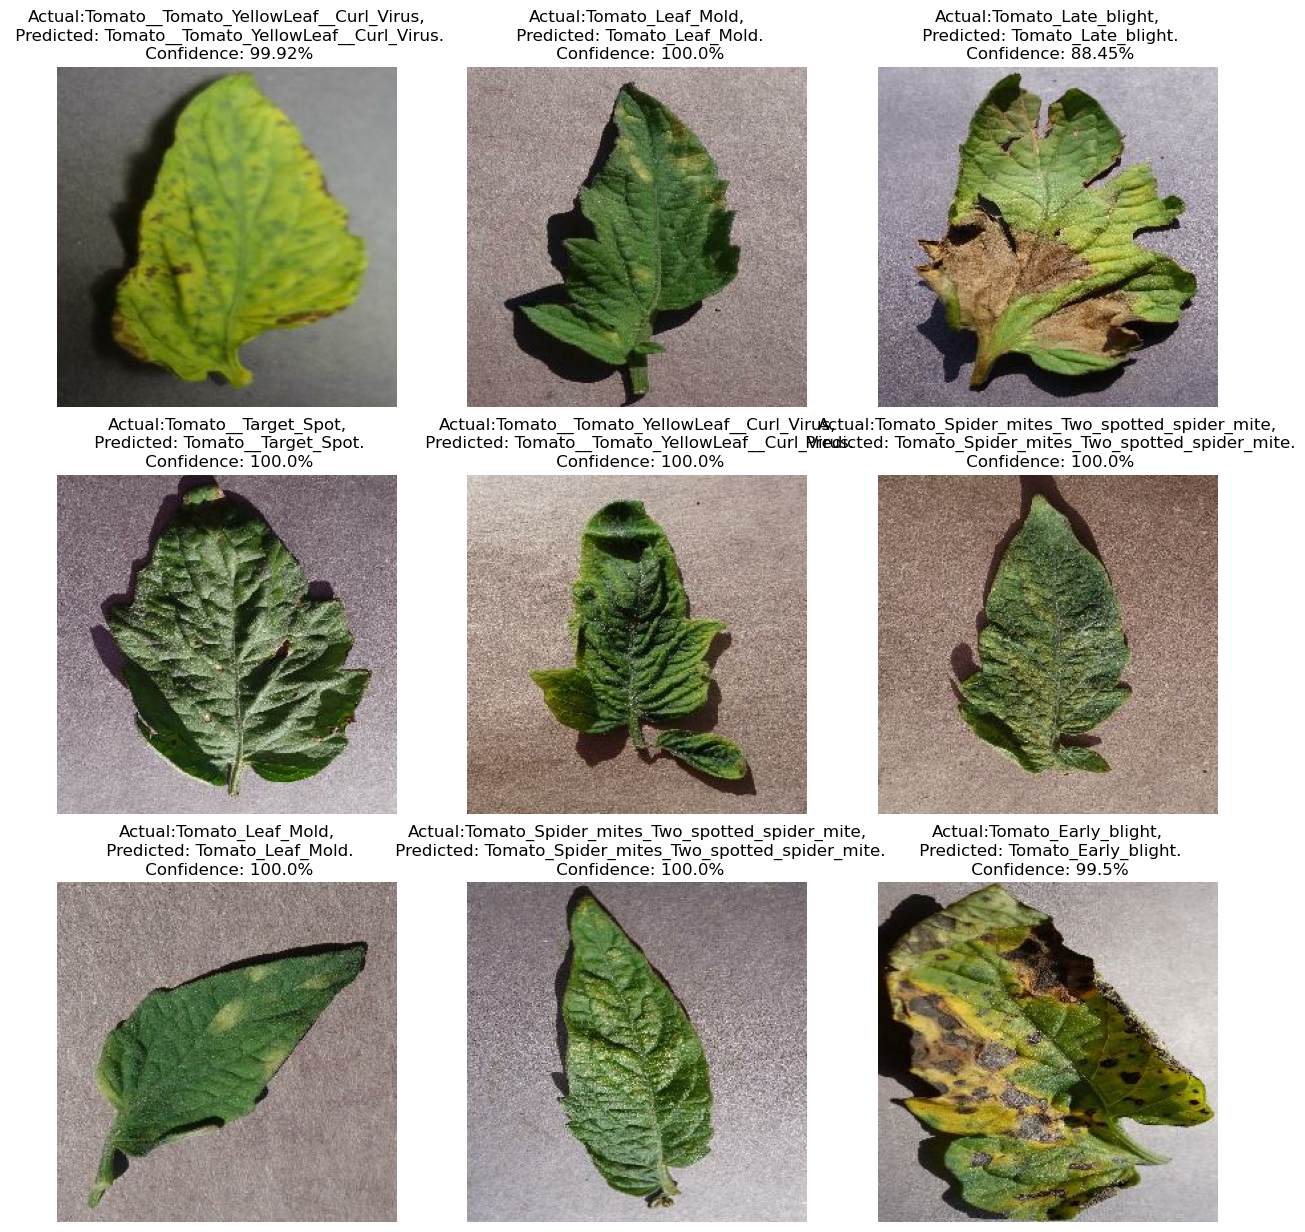

In [29]:
plt.figure(figsize=(15,15))
for images, labels in test_data.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence=predict(m2,images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis('off')

In [30]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
m2.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/4\assets


INFO:tensorflow:Assets written to: ../models/4\assets
